## Linear Regression without GD

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
class LR:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - y_train.mean()))
            
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        
    def predict(self, X_test):
        return self.m * X_test + self.b

In [5]:
X = np.array([1,2,3,4,5])
y = np.array([2,3,3,4,5])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [9]:
lr = LR()
lr.fit(X_train, y_train)

In [10]:
X_test

array([3])

In [11]:
y_pred = lr.predict(X_test)

In [13]:
print("Slope (m)", lr.m)
print("Intercept (b)", lr.b)
print("Predicted Value", y_pred)

Slope (m) 0.7
Intercept (b) 1.4000000000000004
Predicted Value [3.5]


In [14]:
new_x = np.array([6,7])
new_prediction = lr.predict(new_x)
print("Predicted Value for new X", new_prediction)

Predicted Value for new X [5.6 6.3]


## Linear Regression with GD

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1) 

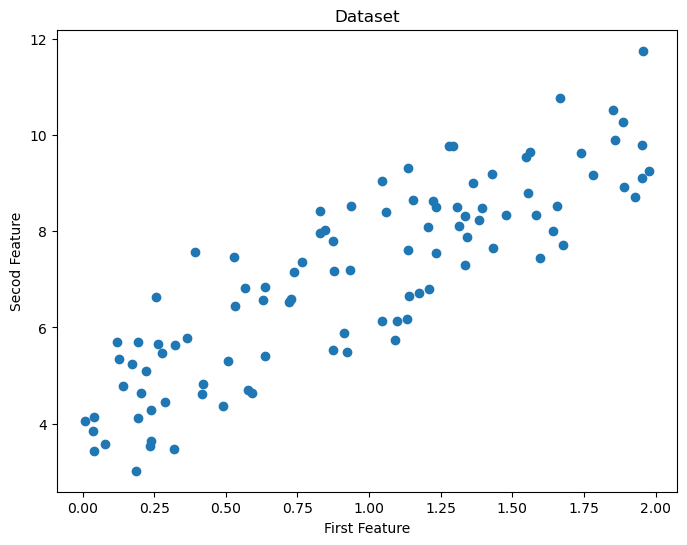

In [3]:
fig = plt.figure(figsize =(8,6))
plt.scatter(X,y)
plt.title("Dataset")
plt.xlabel("First Feature")
plt.ylabel("Secod Feature")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = X[:80], X[80:], y[:80], y[80:]

In [5]:
X_test

array([[0.63596636],
       [0.82852599],
       [0.12829499],
       [1.38494424],
       [1.13320291],
       [0.53077898],
       [1.04649611],
       [0.18788102],
       [1.15189299],
       [1.8585924 ],
       [0.6371379 ],
       [1.33482076],
       [0.26359572],
       [1.43265441],
       [0.57881219],
       [0.36638272],
       [1.17302587],
       [0.04021509],
       [1.65788006],
       [0.00939095]])

In [6]:
class LinearReg:
    def __init__(self, lr, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        
    def fit(self, X, y):
        self.theta = np.random.randn(2,1)
        self.loss_history = []
        
        
        for itertaions in range(self.n_iterations):
            predictions = X.dot(self.theta)
            error = predictions - y
            gradient = X.T.dot(error)/len(y)
            self.theta -= self.lr * gradient
            
            mse = np.mean(error**2)
            self.loss_history.append(mse)
        return self
    
    def get_loss_history(self):
        return self.loss_history

    def predict(self, X):
        return X.dot(self.theta)

In [7]:
X_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
y_train = y_train

In [8]:
model = LinearReg(lr = 0.01, n_iterations=1000)
model.fit(X_b, y_train)

In [9]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = model.predict(X_test_b)

In [10]:
y_pred

array([[6.10978923],
       [6.69845143],
       [4.55781834],
       [8.39944343],
       [7.62986049],
       [5.78822738],
       [7.36479447],
       [4.73997512],
       [7.6869968 ],
       [9.84740406],
       [6.11337069],
       [8.24621402],
       [4.97143788],
       [8.54529525],
       [5.93506673],
       [5.28566169],
       [7.75160082],
       [4.28855469],
       [9.23381873],
       [4.19432411]])

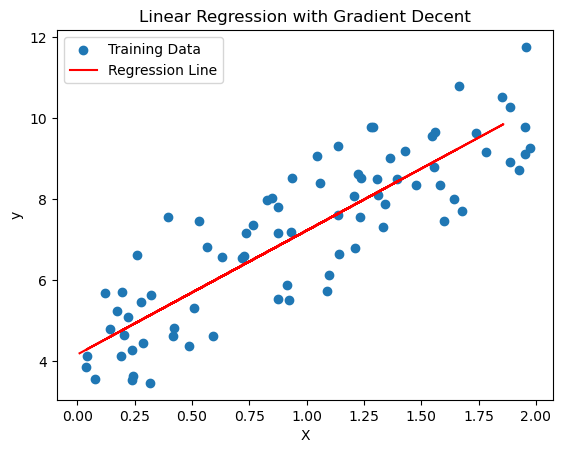

In [11]:
plt.scatter(X_train, y_train, label="Training Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with Gradient Decent")
plt.show()

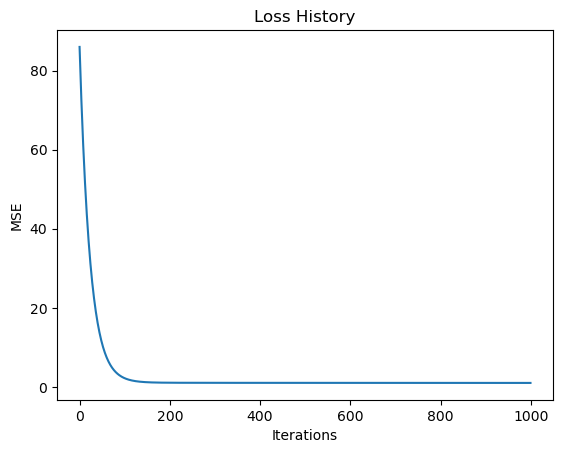

In [12]:
loss_history = model.get_loss_history()
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Loss History")
plt.show()